In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
accidents_dataset = pd.read_csv("US_Accidents_Dec21_updated.csv", na_values='')
display(accidents_dataset.head())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


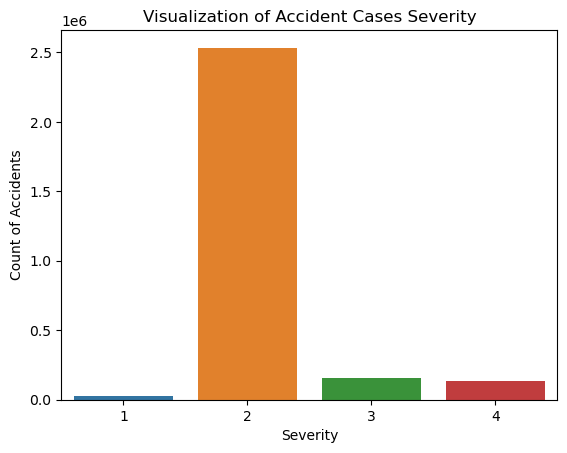

In [9]:
sns.countplot(x='Severity', data=accidents_dataset)
plt.xlabel('Severity')
plt.ylabel('Count of Accidents')
plt.title('Visualization of Accident Cases Severity')
plt.show()

In [10]:
accidents_dataset.rename(columns={'Visibility(mi)': 'Visibility', 'Wind_Speed(mph)': 'Wind_Speed'}, inplace=True)
display(accidents_dataset.head())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


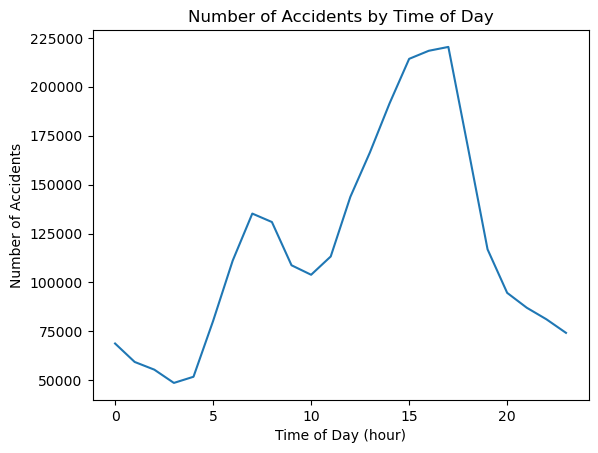

In [11]:
accidents_dataset['hour'] = pd.to_datetime(accidents_dataset['Start_Time']).dt.hour
hourly_counts = accidents_dataset.groupby('hour').size().reset_index(name='count')
sns.lineplot(x='hour', y='count', data=hourly_counts)
plt.title('Number of Accidents by Time of Day')
plt.xlabel('Time of Day (hour)')
plt.ylabel('Number of Accidents')
plt.show()

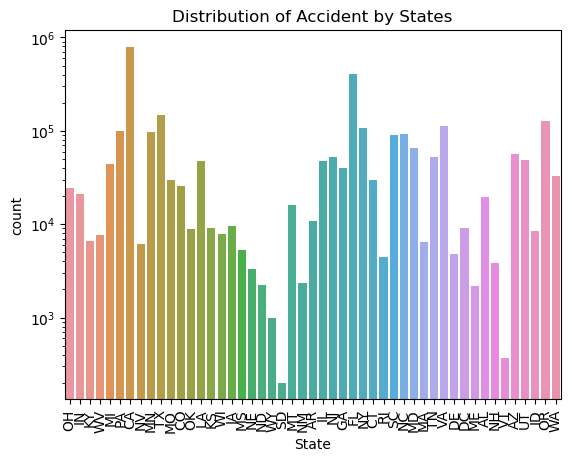

In [12]:
sns.countplot(x='State', data=accidents_dataset)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of Accident by States')
plt.show()

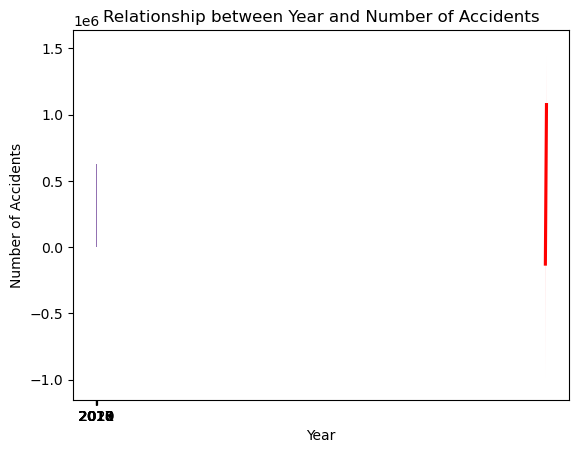

In [13]:
accidents_dataset['Year'] = pd.to_datetime(accidents_dataset['Start_Time']).dt.year
yearly_counts = accidents_dataset.groupby('Year').size().reset_index(name='AccidentCount')
sns.barplot(x='Year', y='AccidentCount', data=yearly_counts, ci=None)
sns.regplot(x='Year', y='AccidentCount', data=yearly_counts, scatter=False, color='red')
plt.title('Relationship between Year and Number of Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

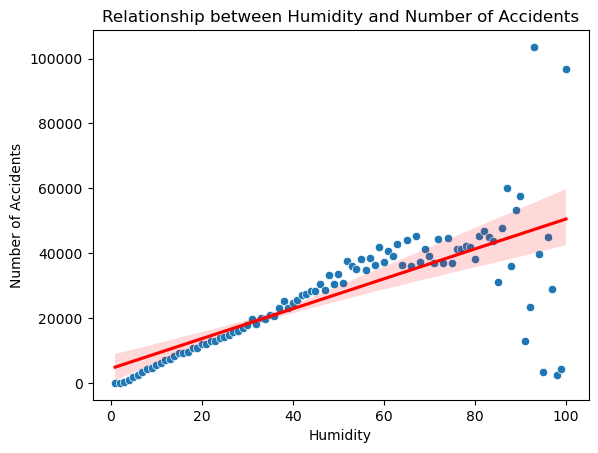

In [14]:
humidity_counts = accidents_dataset.groupby('Humidity(%)').size().reset_index(name='AccidentCount')
sns.scatterplot(x='Humidity(%)', y='AccidentCount', data=humidity_counts)
sns.regplot(x='Humidity(%)', y='AccidentCount', data=humidity_counts, scatter=False, color='red')
plt.title('Relationship between Humidity and Number of Accidents')
plt.xlabel('Humidity')
plt.ylabel('Number of Accidents')
plt.show()

In [16]:
accidents_dataset.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility', 'Wind_Direction',
       'Wind_Speed', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'hour', 'Year'],
      dtype='object')

In [19]:
accidents_dataset.info()
df = accidents_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [22]:
#df.iloc[:, : 11].columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number'],
      dtype='object')

In [32]:
df.iloc[:, 11 : 23]

,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F)
0,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1
1,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN
2,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN
3,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN
4,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0
2845338,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0
2845339,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0
2845340,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0


In [43]:
df.iloc[:, 11 : 23].describe()

,Temperature(F),Wind_Chill(F)
count,2.776068e+06,2.375699e+06
mean,6.179356e+01,5.965823e+01
std,1.862263e+01,2.116097e+01
min,-8.900000e+01,-8.900000e+01
25%,5.000000e+01,4.600000e+01
50%,6.400000e+01,6.300000e+01
75%,7.600000e+01,7.600000e+01
max,1.960000e+02,1.960000e+02


In [48]:
df.iloc[:, 11 : 23].isna().sum()

Street                    2
Side                      0
City                    137
County                    0
State                     0
Zipcode                1319
Country                   0
Timezone               3659
Airport_Code           9549
Weather_Timestamp     50736
Temperature(F)        69274
Wind_Chill(F)        469643
dtype: int64

In [49]:
df["City"].mode()

0    Miami
Name: City, dtype: object

In [ ]:
df["City"].mode()

In [29]:
#df.iloc[:, 23 : 34].columns

Index(['Humidity(%)', 'Pressure(in)', 'Visibility', 'Wind_Direction',
       'Wind_Speed', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way'],
      dtype='object')

In [30]:
#df.iloc[:, 34 : 46].columns

Index(['Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight'],
      dtype='object')